# Basic data viz: Manufacturing Sector Real Output
We'll use American manufacturing sector output (MS) from 1988 to 2016 to demonstrate basic Python scientific and data visualization library techniques.

[The data](https://fred.stlouisfed.org/series/OUTMS) comes from the St. Louis Federal Reserve's remarkable FRED tool.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()

This is where you can change file paths and chart dimensions.

In [2]:
date_column = 'DATE'
variable_column = 'OUTMS'
data_file = "data/OUTMS.csv"
chart_length = 10
chart_width = 15

Now we go over to the file, grab the data, and prepare it for plotting.

In [3]:
df = pd.read_csv(data_file)
df[date_column]=pd.to_datetime(df[date_column])
df = df.set_index(date_column)

# 'OUTMS' is not a useful name for the column
df.rename(columns={'OUTMS':'ms'}, inplace=True)
df['perc'] = df.pct_change()

And finally we build the plot.

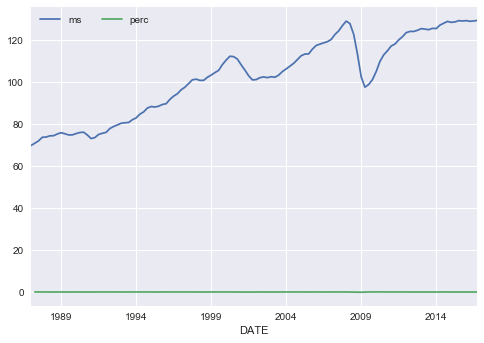

In [4]:
plt.figure()
df.plot()
plt.legend(ncol=2, loc='upper left')
plt.show()

Manufacturing has grown over time! Mostly!

Out of curiosity, let's consider it as a percentage, and divide the timeline up by presidential terms.

First... I know when each president in recent decades took office, but I would rather not hard-code all that. This is (one reason) why we like files:

In [5]:
pres_terms = pd.read_csv("data/presidents.csv", index_col=0)
pres_terms["Tookoffice"]=pd.to_datetime(pres_terms["Tookoffice"])

Now we'll draw lines automatically from the presidents file we just pulled. The coding, now, will be about colors, tick marks, etc. rather than line locations.

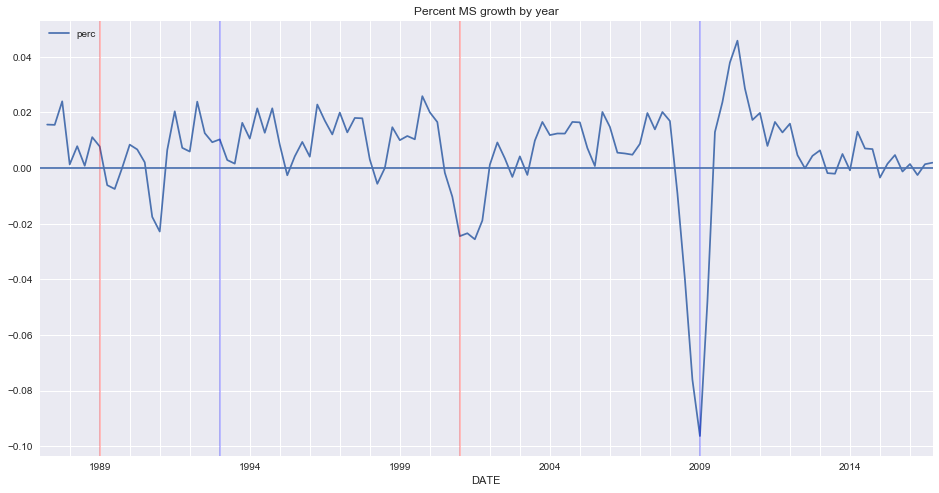

In [7]:
plt.figure()

offset = pd.Timedelta(1461, 'D')
start = pd.to_datetime('1989-01-20')

df.plot(y='perc',figsize=(16,8))

party_color = "blue"
i = 1

for date in pres_terms["Tookoffice"]:
    if pres_terms["Party"][i]=="Republican":
        party_color="red"
    else:
        party_color="blue"
    plt.axvline(date, alpha=0.3, color=party_color)
    i = i+1

plt.xticks(pd.date_range(start='1988',end='2017',freq='12M'))

plt.axhline(0)

plt.legend(ncol=2, loc='upper left')
plt.title('Percent MS growth by year')
plt.show()

That downturn tho...

That's some of the *really* basic stuff:
- Plotting data from a file
- Using Seaborn over Matplotlib
- Drawing lines from a file and color-coding them
- Percentages are different from raw values
- Mostly the economy grows